In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('revenue_prediction_sub.csv')

In [3]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [5]:
df.drop(columns= ['Id'], inplace=True)

In [6]:
df.shape

(100, 7)

In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,1.000000e+02
mean,49.080000,4.086000,4.395161e+06
std,22.370923,2.055101,2.659932e+06
min,18.000000,1.000000,8.498700e+05
25%,34.750000,2.750000,2.688328e+06
50%,45.000000,3.650000,3.911401e+06
75%,57.250000,5.100000,5.330084e+06
max,126.000000,13.000000,1.969694e+07


## **EDA**

#### Distribution of numerical columns

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
sns.set(style = 'whitegrid')

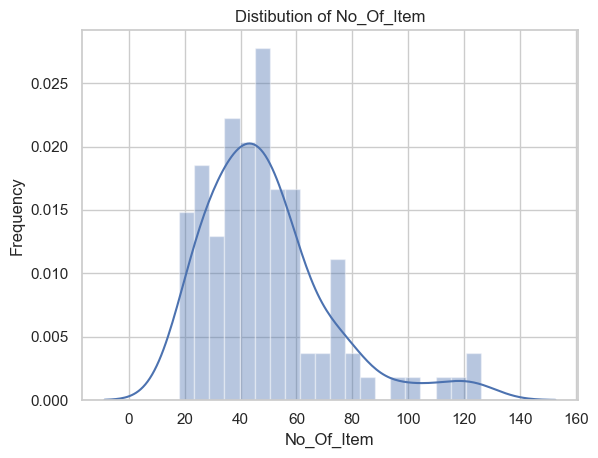

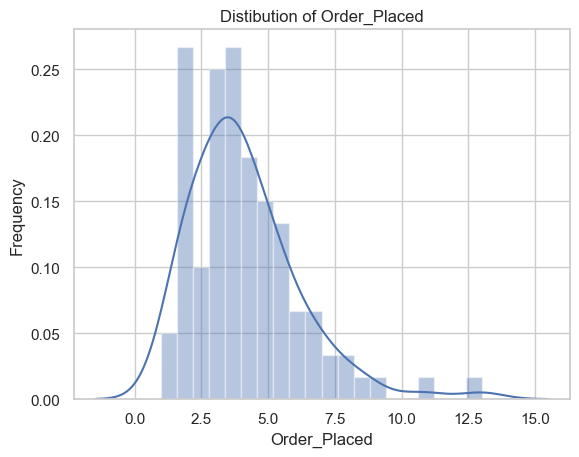

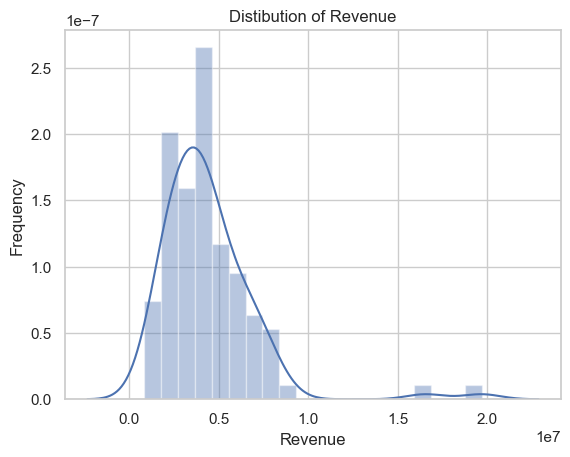

In [12]:
for col in df.columns:
    if (df[col].dtype != 'object'):
        sns.distplot(df[col], bins = 20, kde = True)
        plt.title(f'Distibution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

### **Categorical Variable Analysis**

In [13]:
category_num = df['Category'].value_counts()
category_num

Category
Varied Menu        16
Mexican            10
Pizza               9
Steak               7
Family Style        7
Burger              7
Sandwich            7
Italian/Pizza       7
Bakery Cafe         5
BBQ                 4
Seafood             4
Family Casual       3
Frozen Desserts     2
Coffee Cafe         2
Chicken             2
Sports Bar          2
Asian/Noodle        2
Snack               2
Asian               1
Healthy             1
Name: count, dtype: int64

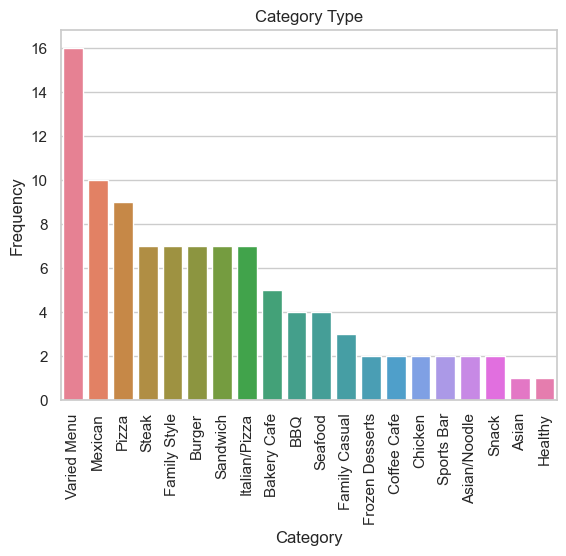

In [14]:
sns.barplot(x = category_num.index, y = category_num.values, hue = category_num.index )
plt.title('Category Type')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

### **Correlation**

In [15]:
corr = df.corr(numeric_only=True)

In [16]:
corr

,No_Of_Item,Order_Placed,Revenue
No_Of_Item,1.000000,0.973335,0.892194
Order_Placed,0.973335,1.000000,0.929407
Revenue,0.892194,0.929407,1.000000


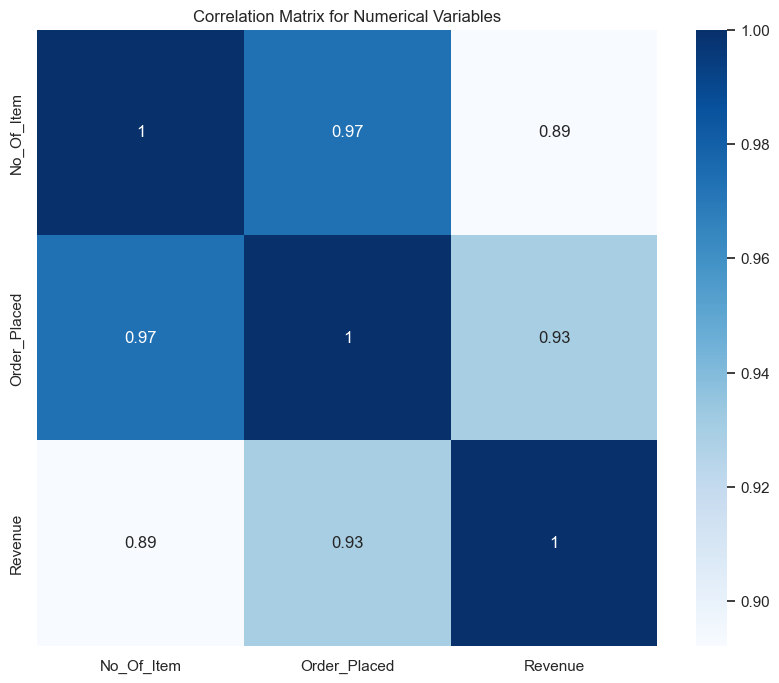

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

### **Outlier Detection**

In [18]:
num_var = ['No_Of_Item', 'Order_Placed', 'Revenue']

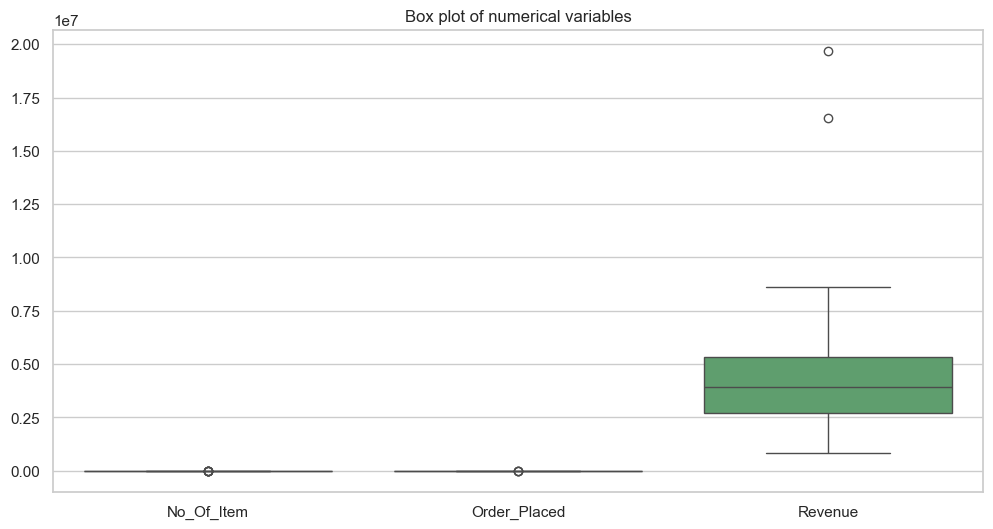

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df[num_var])
plt.title('Box plot of numerical variables')
plt.show()

## **Model Selection & Evaluation**

In [24]:
df = pd.get_dummies(df).replace({True : 1, False : 0})

In [25]:
df

,No_Of_Item,Order_Placed,Revenue,Name_A&WAll-AmericanFood,Name_AuBonPain,Name_BahamaBreezeIslandGrille,Name_BarLouie,Name_Benihana,Name_BigBoy/Frisch'sBigBoy,Name_BlackBearDiner,...,Category_Seafood,Category_Snack,Category_Sports Bar,Category_Steak,Category_Varied Menu,City_Bengaluru,City_Gurugram,City_Mumbai,City_Noida,City_Pune
0,55,5.5,5953753,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,72,6.8,7223131,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,25,1.9,2555379,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,18,2.5,2175511,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,48,4.2,4816715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,1.1,1270499,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
96,75,6.3,6412623,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
97,77,6.2,6694797,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
98,25,2.1,2344689,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x = df.drop(['Revenue'], axis=1)
y = df['Revenue']

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()

In [30]:
model.fit(xtrain, ytrain)

LinearRegression()

In [31]:
ypred = model.predict(xtest)

In [32]:
from sklearn.metrics import *

In [33]:
r2_score(ytest, ypred)

0.732905225108996